In [1]:
# import needed libraries
import os
import sys 
from collections import OrderedDict 
# import local libraries 
# path of local project 
folder_path ='/home/yaga/Dropbox/femai'
sys.path.insert(0,folder_path)

from femai.DesignOfExperiment.Samplers import FixNumberSampler
from SimulatorCaller import SimulatorCaller

In [2]:
## create the doe
# define the design space
doe_variables = OrderedDict({'Volume_req': 0.30})
# define number of samples
num_points = 3
# define the information of outputs
name_outputs = ['Volume_frac', 'PK2', 'Green_strain']

doe_sampler = FixNumberSampler()
samples = doe_sampler.Sampling(num_samples=num_points,
                               design_space=doe_variables,
                               out_names=name_outputs)
print(samples)

   Volume_req Volume_frac  PK2 Green_strain
0         0.3         NaN  NaN          NaN
1         0.3         NaN  NaN          NaN
2         0.3         NaN  NaN          NaN


In [3]:
simulation_wrapper = SimulatorCaller()
simulation_wrapper.UpdateSimulationInformation(print_info=True) 

The general geometry information of RVE: {'length': 0.048, 'width': 0.048, 'radius': 0.003}
The required volume fraction is: None
The information of the Abaqus simulation : {'mesh_partition': 30, 'loads': [0.05, 0.0, 0.0], 'simulation_time': 10.0} 



In [4]:
samples = simulation_wrapper.RunSimulation(DoE=samples)
print(samples)

Time of generate the 2D RVE with volume fraction = 0.3067961575771284 is 0.020475387573242188 s
Current working directory: /home/jiaxiangyi/Dropbox/femai/Examples/ASCARVE/Data/point_0
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<14 out of 30 licenses remain available>.


Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

0
time cost of this iteraion: 40.0815544128418
##################################################
########### START ABAQUS POST ANALYSIS ###########
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<14 out of 30 licenses remain available>.


Time of generate the 2D RVE with volume fraction = 0.3067961575771284 is 0.009283065795898438 s
Current working directory: /home/jiaxiangyi/Dropbox/femai/Examples/ASCARVE/Data/point_1
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<14 out of 30 licenses remain available>.


Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

0
time cost of this iteraion: 40.07985305786133
##################################################
########### START ABAQUS POST ANALYSIS ###########
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<14 out of 30 licenses remain available>.


Time of generate the 2D RVE with volume fraction = 0.3067961575771284 is 0.01219630241394043 s
Current working directory: /home/jiaxiangyi/Dropbox/femai/Examples/ASCARVE/Data/point_2
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<14 out of 30 licenses remain available>.


Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

0
time cost of this iteraion: 40.08281421661377
##################################################
########### START ABAQUS POST ANALYSIS ###########
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<14 out of 30 licenses remain available>.


   Volume_req Volume_frac                                                PK2  \
0         0.3    0.306796  [[[0.0, 0.0], [0.0, 0.0]], [[0.030239188127126...   
1         0.3    0.306796  [[[0.0, 0.0], [0.0, 0.0]], [[0.029365443549117...   
2         0.3    0.306796  [[[0.0, 0.0], [0.0, 0.0]], [[0.026108774301770...   

                                        Green_strain  
0  [[[0.0, 0.0], [0.0, 0.0]], [[0.000500125033910...  
1  [[[0.0, 0.0], [0.0, 0.0]], [[0.000500125025832...  
2  [[[0.0, 0.0], [0.0, 0.0]], [[0.000500125073486...  


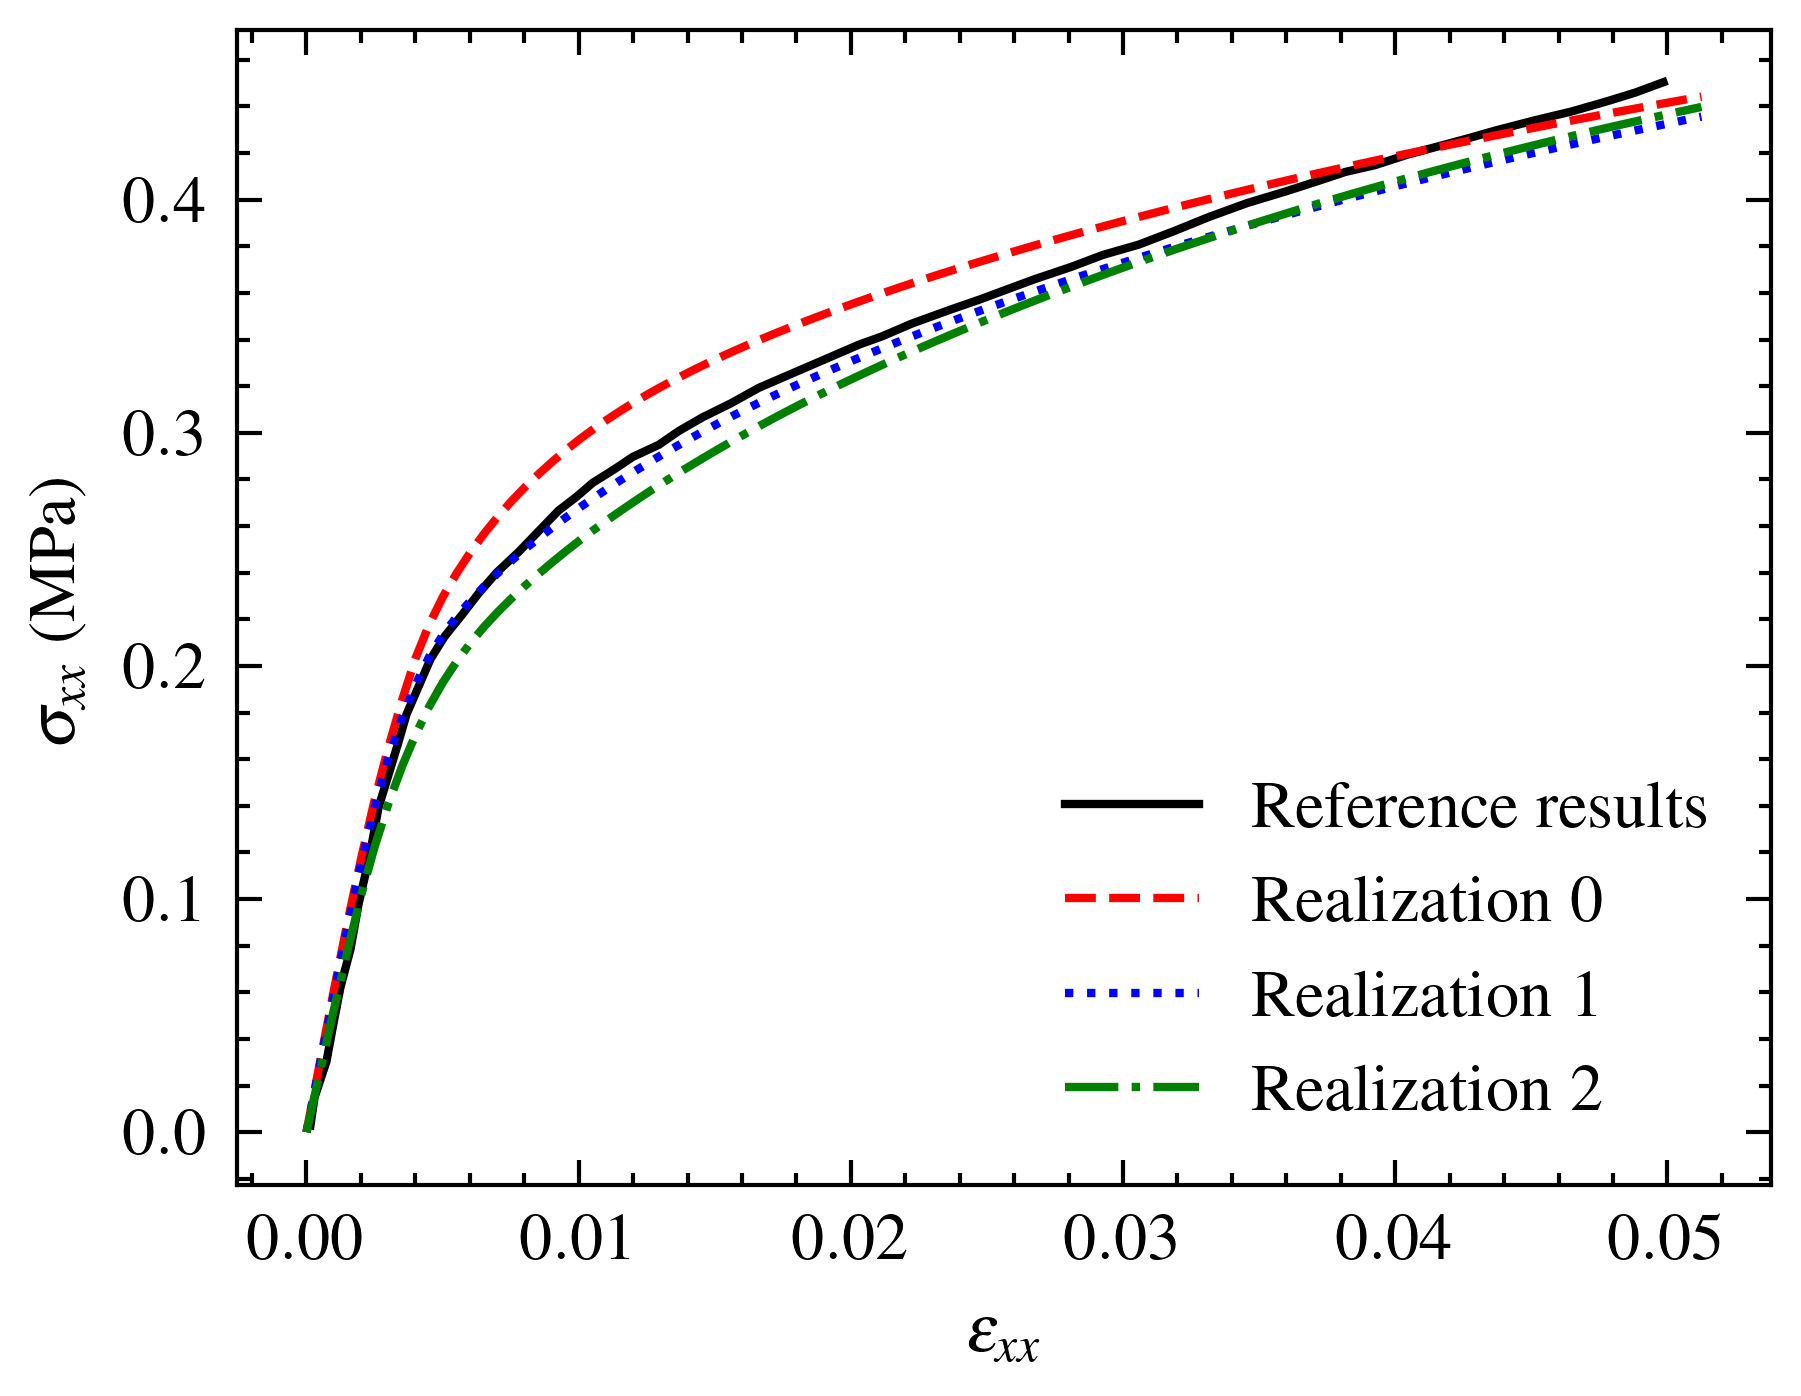

In [5]:
## visualization of the results of stress-strain 
import pandas as pd 
from matplotlib import pyplot as plt
exp_data = pd.read_csv('Original data.csv', header=None)
pparam = dict(xlabel='$\epsilon_{xx}$', ylabel='$\sigma_{xx}$ (MPa)')
with plt.style.context(['science', 'ieee']):
    fig, ax = plt.subplots()
    ax.plot(exp_data.loc[:,0],  exp_data.loc[:,1],  label='Reference results')
    ax.plot(samples['Green_strain'][0][:, 0, 0],  samples['PK2'][0][:, 0, 0],  label='Realization 0')
    ax.plot(samples['Green_strain'][1][:, 0, 0],  samples['PK2'][1][:, 0, 0],  label='Realization 1')
    ax.plot(samples['Green_strain'][2][:, 0, 0],  samples['PK2'][2][:, 0, 0],  label='Realization 2')
    ax.legend()
    ax.set(**pparam)
    plt.show(block=False)
    fig.savefig('fig1.pdf')
    fig.savefig('fig1.png', dpi=600)


